In [1]:
from IPython.display import Image, display

In [2]:
!rm $(find examples/segmentation -name 'data.dill.gz')
!rm $(find examples/segmentation -name '.task.json')
!rm $(find examples/segmentation -name '.sha.json')

In [3]:
%cat examples/segmentation/task.yml

runnable: true

pipeline:
  - tests.test_repype.Download
  - tests.test_repype.Unzip
  - tests.test_repype.Segmentation
  - tests.test_repype.Output

config:
  download:
    url: https://zenodo.org/record/3362976/files/B2.zip

scopes:
  segmentation: 'seg/%s.png'

inputs:
  - B2--W00026--P00001--Z00000--T00000--dapi.tif

In [4]:
%cat examples/segmentation/sigma=2/task.yml

config:
  segmentation:
    sigma: 2

In [5]:
!command python -m repype.cli examples/segmentation


2 task(s) selected for running
DRY RUN: use "--run" to run the tasks instead


In [6]:
!command python -m repype.cli examples/segmentation --run


2 task(s) selected for running
  
  (1/2) Entering task: /Users/void/Documents/pypers/examples/segmentation
  Starting from scratch
    
    (1/1) Processing input: B2--W00026--P00001--Z00000--T00000--dapi.tif
                                
  Results have been stored ✅
  
  (2/2) Entering task: /Users/void/Documents/pypers/examples/segmentation/sigma=2
  Picking up from: /Users/void/Documents/pypers/examples/segmentation (segmentation)
    
    (1/1) Processing input: B2--W00026--P00001--Z00000--T00000--dapi.tif
                                
  Results have been stored ✅


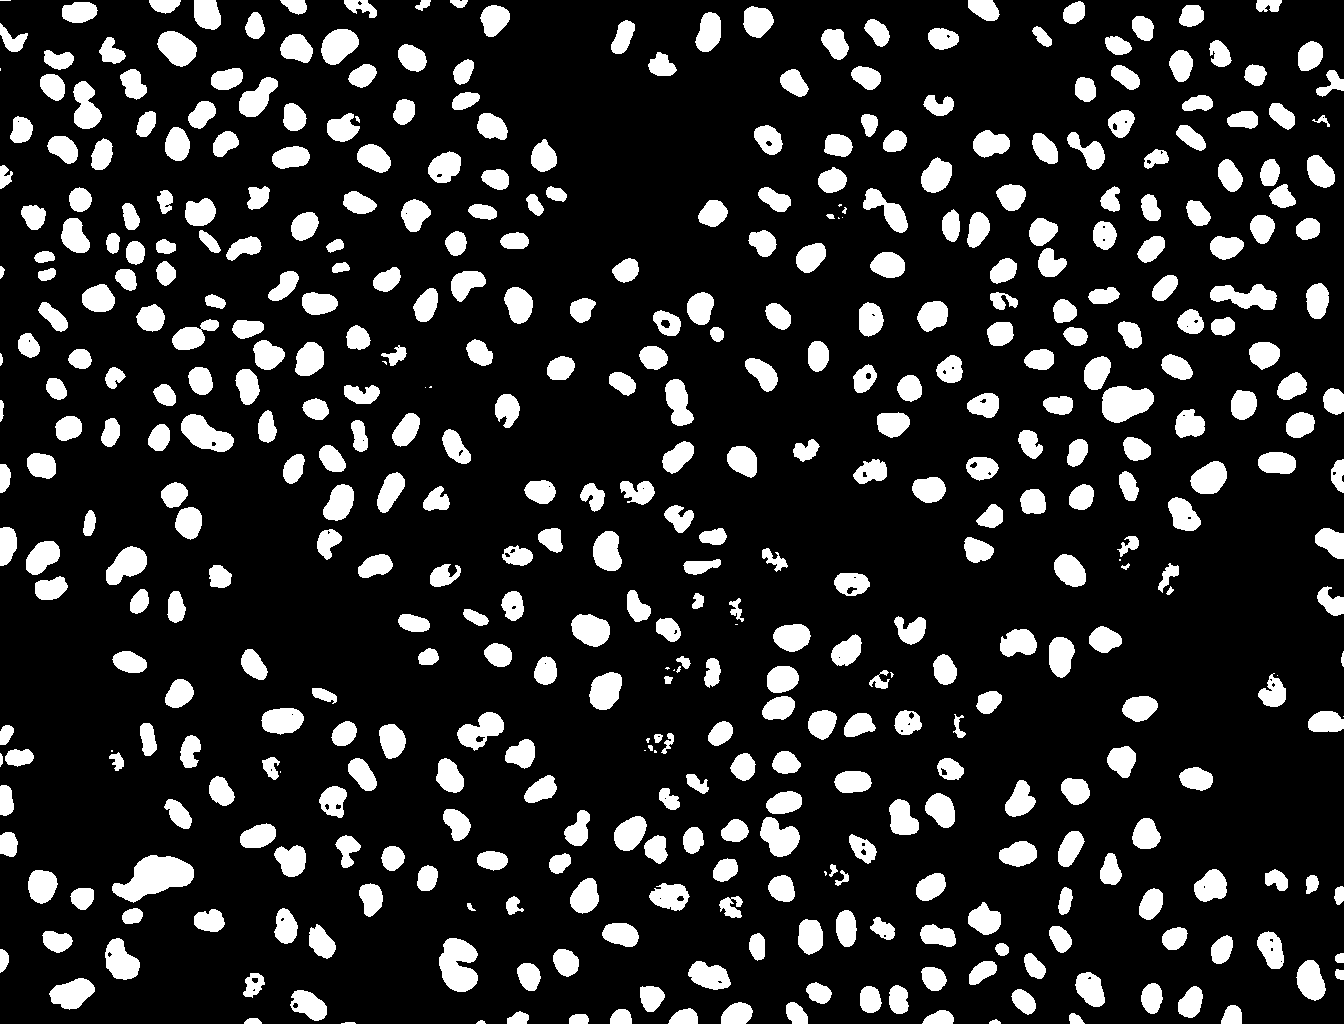

In [7]:
display(Image(filename = 'examples/segmentation/seg/B2--W00026--P00001--Z00000--T00000--dapi.tif.png'))

In [8]:
import tests.test_repype

class Segmentation(tests.test_repype.Segmentation):

    def process(self, image, pipeline, config, status = None):
        seg = super().process(image, pipeline, config, status)['segmentation']
        radius = config.get('radius', 5)
        
        import skimage
        selem = skimage.morphology.disk(radius)
        return {
            'segmentation': skimage.morphology.closing(seg, selem)
        }

In [9]:
import repype.task

class Task(repype.task.Task):

    def create_pipeline(self, *args, **kwargs):
        pipeline = super().create_pipeline(*args, **kwargs)
        pipeline.stages[pipeline.find('segmentation')] = Segmentation()
        return pipeline

In [10]:
import repype.cli

main = repype.cli.main('examples/segmentation', run = True, task_cls = Task)
await main();


2 task(s) selected for running
  
  (1/2) Entering task: /Users/void/Documents/pypers/examples/segmentation
  Picking up from: /Users/void/Documents/pypers/examples/segmentation (segmentation)
    
    (1/1) Processing input: B2--W00026--P00001--Z00000--T00000--dapi.tif
                                
  Results have been stored ✅
  
  (2/2) Entering task: /Users/void/Documents/pypers/examples/segmentation/sigma=2
  Picking up from: /Users/void/Documents/pypers/examples/segmentation (segmentation)
    
    (1/1) Processing input: B2--W00026--P00001--Z00000--T00000--dapi.tif
                                
  Results have been stored ✅


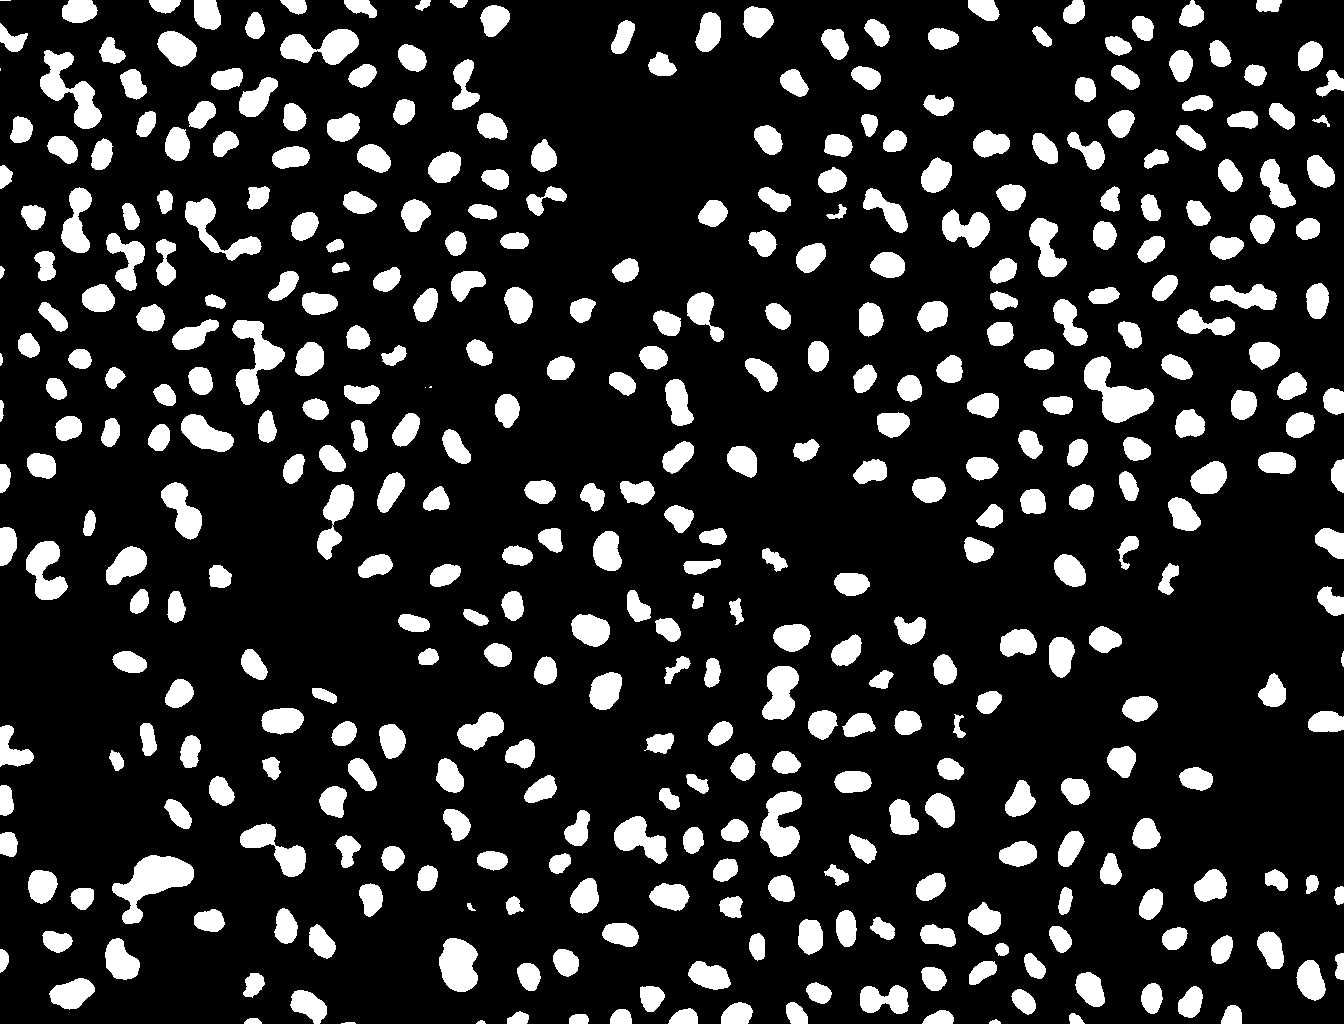

In [11]:
display(Image(filename = 'examples/segmentation/seg/B2--W00026--P00001--Z00000--T00000--dapi.tif.png'))